In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [187]:
df_info = pd.read_csv('C:\\артем общее2\\учеба\\уник\\python\\питон2\\Проект\\ИТОГ 01.06\\Parcer data info.txt')
df_additions = pd.read_csv('C:\\артем общее2\\учеба\\уник\\python\\питон2\\Проект\\ИТОГ 01.06\\Parcer data additions.txt')

In [188]:
df_info.head()

,Link,Цена,Пешком до метро,Станция метро,Адрес,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,Ремонт,Год постройки,Строительная серия,Тип дома,Аварийность,доп инфа
0,https://www.cian.ru/rent/flat/278216280/,ID,1 мин.,Охотный ряд,"['Москва', 'ЦАО', 'р-н Тверской', 'ул. Охотный...",90,NaN,NaN,NaN,"1 совмещенный, 1 раздельный",NaN,Дизайнерский,2015.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²"
1,https://www.cian.ru/rent/flat/301171666/,300000,4 мин.,Деловой центр,"['Москва', 'ЦАО', 'р-н Пресненский', '1-й Крас...",85,40,17,"3,2 м",2 совмещенных,NaN,Дизайнерский,NaN,NaN,NaN,NaN,"Сдается 2-комн. апартаменты, 85 м²"
2,https://www.cian.ru/rent/flat/257204026/,32000,10 мин.,Черкизовская,"['Москва', 'Большая Черкизовская ул.', '22К1']",40,"18,3","7,6","2,48 м",1 совмещенный,NaN,Косметический,1974.0,ii-68,Панельный,Нет,"Сдается 1-комн. квартира, 40 м²"
3,https://www.cian.ru/rent/flat/289432753/,350000,4 мин.,Деловой центр,"['Москва', 'ЦАО', 'р-н Пресненский', '1-й Крас...",90,45,40,"4,5 м",2 совмещенных,NaN,Евроремонт,2013.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²"
4,https://www.cian.ru/rent/flat/278216280/,ID,1 мин.,Охотный ряд,"['Москва', 'ЦАО', 'р-н Тверской', 'ул. Охотный...",90,NaN,NaN,NaN,"1 совмещенный, 1 раздельный",NaN,Дизайнерский,2015.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²"


In [189]:
df_additions.head()

,Link,В квартире есть,Залог,Срок аренды
0,https://www.cian.ru/rent/flat/278216280/,['ХолодильникПосудомоечная машинаСтиральная ма...,1 000 000 ₽,от года
1,https://www.cian.ru/rent/flat/301171666/,['ХолодильникПосудомоечная машинаСтиральная ма...,300 000 ₽,от года
2,https://www.cian.ru/rent/flat/257204026/,['ХолодильникСтиральная машинаТелевизорИнтерне...,32 000 ₽,от года
3,https://www.cian.ru/rent/flat/289432753/,['ХолодильникПосудомоечная машинаСтиральная ма...,350 000 ₽,от года
4,https://www.cian.ru/rent/flat/278216280/,['ХолодильникПосудомоечная машинаСтиральная ма...,1 000 000 ₽,от года


In [190]:
print(df_info.info())
df_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Link                1933 non-null   object 
 1   Цена                1933 non-null   object 
 2   Пешком до метро     1903 non-null   object 
 3   Станция метро       1906 non-null   object 
 4   Адрес               1933 non-null   object 
 5   Общая площадь       1933 non-null   object 
 6   Жилая площадь       1539 non-null   object 
 7   Площадь кухни       1608 non-null   object 
 8   Высота потолков     1402 non-null   object 
 9   Санузел             1825 non-null   object 
 10  Балкон/лоджия       933 non-null    object 
 11  Ремонт              1904 non-null   object 
 12  Год постройки       1737 non-null   float64
 13  Строительная серия  1214 non-null   object 
 14  Тип дома            1418 non-null   object 
 15  Аварийность         1737 non-null   object 
 16  доп ин

,Link,Цена,Пешком до метро,Станция метро,Адрес,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,Ремонт,Год постройки,Строительная серия,Тип дома,Аварийность,доп инфа
0,https://www.cian.ru/rent/flat/278216280/,ID,1 мин.,Охотный ряд,"['Москва', 'ЦАО', 'р-н Тверской', 'ул. Охотный...",90,NaN,NaN,NaN,"1 совмещенный, 1 раздельный",NaN,Дизайнерский,2015.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²"
1,https://www.cian.ru/rent/flat/301171666/,300000,4 мин.,Деловой центр,"['Москва', 'ЦАО', 'р-н Пресненский', '1-й Крас...",85,40,17,"3,2 м",2 совмещенных,NaN,Дизайнерский,NaN,NaN,NaN,NaN,"Сдается 2-комн. апартаменты, 85 м²"
2,https://www.cian.ru/rent/flat/257204026/,32000,10 мин.,Черкизовская,"['Москва', 'Большая Черкизовская ул.', '22К1']",40,"18,3","7,6","2,48 м",1 совмещенный,NaN,Косметический,1974.0,ii-68,Панельный,Нет,"Сдается 1-комн. квартира, 40 м²"
3,https://www.cian.ru/rent/flat/289432753/,350000,4 мин.,Деловой центр,"['Москва', 'ЦАО', 'р-н Пресненский', '1-й Крас...",90,45,40,"4,5 м",2 совмещенных,NaN,Евроремонт,2013.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²"
4,https://www.cian.ru/rent/flat/278216280/,ID,1 мин.,Охотный ряд,"['Москва', 'ЦАО', 'р-н Тверской', 'ул. Охотный...",90,NaN,NaN,NaN,"1 совмещенный, 1 раздельный",NaN,Дизайнерский,2015.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²"


Опишем используемые переменные:
1.  'Цена' - цена агенды квартиры на месяц
2.  'Пешком до метро' - определяет, сколько минут необходимо идти пешком до ближайшего метро. Если NaN, то метро не в пешей доступности
3.  'Город' - город, в котором сдается квартира. В нашем проекте это Москва
4.  'Округ' - административных округов Москвы (всего их 12)
5.  'Район' - обозначает район москвы (всего их 125)
6.  'Улица' - улица, где находится дом, в котором сдается рассматриваемая квартира
7.  'Номер дома' - номер дома рассматриваемой квартиры
8.  'Общая площадь' - тут понятно
9.  'Жилая площадь' - тут понятно
10. 'Площадь кухни' - тут понятно
11. 'Высота потолков' - тут понятно. Определяется в метрах
12. 'Санузел' - переменная задает не только сколько санузлов в квартире, то и разделенные они или совмещенные
13. 'Балкон/лоджия' - Значения столбца 'Балкон/лоджия' могут включать в себя данные и по балконам, и по лоджиям (сколько лоджий, сколько балконов)
14. 'Ремонт' - задается тип ремонта
15. 'Год постройки' - год постройки дома, в котором сдается квартира
16. 'Строительная серия' - это про планировку самого дома в целом
17. 'Тип дома' - это про то, из чего построен дом
18. 'Аварийность' - это задает состояние дома в целом
19. 'В квартире есть' - в этом пункте на циане собственник дописывает, что еще находится в квартире, тчо остается для арендатора при съеме квартиры. (это может быть телек, диваны, посудомойка и тп)
20. 'доп инфа' - эта переменная была выгружена для выделения оттуда кол-ва комнат
21. 'Залог' - показывает, сколько необходимо внести в качестве залога за квартиру при заключении договора
22. 'Срок аренды' - минимальный срок аренды

# Шаг 3: Предварительныя обработка (максимум 10 баллов)

__Удалим все дубликаты и повторы в данных__

In [191]:
#Удалим все строки, которые были не заполнены ни одним значением 
df_additions.dropna(axis=0, how='all',inplace=True)
df_info.dropna(axis=0, how='all', inplace=True)

In [192]:
#еще раз проверим на дубликаты, но уже после парсинга данных по ссылкам
print(df_info.duplicated().sum())
df_info.drop_duplicates(inplace = True) #Удалили все дубликаты


315


 __Необходимо разбить столбец "Адрес" на составляющие__

In [193]:
# Преобразуем выгрузку адреса в список из элементов адреса
df_info['Адрес'] = df_info['Адрес'].apply(lambda x: x.strip('[]').split(', '))

# проверим кол-во элементов дреса по всем строчкам
df_info['Адрес'].map(len).unique()


array([5, 3, 4, 7, 6], dtype=int64)

In [194]:
print(df_info['Адрес'].apply(lambda x: x[0]).unique())
print(df_info['Адрес'].apply(lambda x: x[1]).unique())
print(df_info['Адрес'].apply(lambda x: x[2]).unique())


["'Москва'" "'Московская область'"]
["'ЦАО'" "'Большая Черкизовская ул.'" "'ЮАО'" "'Саввинская наб.'"
 "'НАО (Новомосковский)'" "'Сосенское поселение'" "'Тагильская ул.'"
 "'ЗАО'" "'ул. Серпуховский Вал'" "'Мосфильмовская ул.'"
 "'Грайвороновская ул.'" "'ул. Федора Полетаева'"
 "'ул. Летчика Бабушкина'" "'Петровско-Разумовский проезд'"
 "'Дмитровское ш.'" "'ВАО'" "'1-й Красногвардейский проезд'"
 "'Верхняя Первомайская ул.'" "'ул. Островитянова'"
 "'Малая Филевская ул.'" "'Жигулевская ул.'" "'ул. Маршала Федоренко'"
 "'2-я Владимирская ул.'" "'САО'" "'просп. Вернадского'"
 "'Рязановское поселение'" "'пер. Колокольников'" "'Профсоюзная ул.'"
 "'ЮВАО'" "'Коммунарка поселок'" "'просп. Лихачева'"
 "'Солнечногорский проезд'" "'СЗАО'" "'Большая Черемушкинская ул.'"
 "'Синявинская ул.'" "'Ботаническая ул.'" "'Кутузовский просп.'"
 "'ул. Василисы Кожиной'" "'Десеновское поселение'" "'Хавская ул.'"
 "'ул. Маршала Бирюзова'" "'СВАО'" "'ул. Космонавта Волкова'"
 "'Большая Марьинская ул.'" "'ул. С

In [195]:
cnt = 0

def count_dist(value):
    global cnt
    # Объединяем все элементы списка в одну строку, разделяя их пробелами
    address_str = ' '.join(map(str, value))
    if 'р-н' in address_str.lower():
        cnt += 1
    return cnt

df_info['Адрес'].apply(lambda x: count_dist(x))
total_count = count_dist('')
total_count


608

Смотря на выгрузку, выделили все 12 округов (определили, в каком формате они записаны на Циан). Районы можно определить по 'р-н'. Остальное при анализе не играет роли (рассматриваем только мск и мск область, если что, а так как квартир не отсюда нет, то можно столбец не рассматривать)

In [196]:
# Районы можем определить по элементу "p-н"
# Определяем функцию для фильтрации элементов списка
def contains_district(lst):
    districts = [elem for elem in lst if 'р-н' in elem]
    return districts[0] if districts else np.nan
df_info['Районы'] = df_info['Адрес'].apply(contains_district)
df_info.head()

,Link,Цена,Пешком до метро,Станция метро,Адрес,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,Ремонт,Год постройки,Строительная серия,Тип дома,Аварийность,доп инфа,Районы
0,https://www.cian.ru/rent/flat/278216280/,ID,1 мин.,Охотный ряд,"['Москва', 'ЦАО', 'р-н Тверской', 'ул. Охотный...",90,NaN,NaN,NaN,"1 совмещенный, 1 раздельный",NaN,Дизайнерский,2015.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²",'р-н Тверской'
1,https://www.cian.ru/rent/flat/301171666/,300000,4 мин.,Деловой центр,"['Москва', 'ЦАО', 'р-н Пресненский', '1-й Крас...",85,40,17,"3,2 м",2 совмещенных,NaN,Дизайнерский,NaN,NaN,NaN,NaN,"Сдается 2-комн. апартаменты, 85 м²",'р-н Пресненский'
2,https://www.cian.ru/rent/flat/257204026/,32000,10 мин.,Черкизовская,"['Москва', 'Большая Черкизовская ул.', '22К1']",40,"18,3","7,6","2,48 м",1 совмещенный,NaN,Косметический,1974.0,ii-68,Панельный,Нет,"Сдается 1-комн. квартира, 40 м²",NaN
3,https://www.cian.ru/rent/flat/289432753/,350000,4 мин.,Деловой центр,"['Москва', 'ЦАО', 'р-н Пресненский', '1-й Крас...",90,45,40,"4,5 м",2 совмещенных,NaN,Евроремонт,2013.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²",'р-н Пресненский'
8,https://www.cian.ru/rent/flat/301264083/,150000,14 мин.,Спортивная,"['Москва', 'ЦАО', 'р-н Хамовники', 'Фрунзенска...","58,1",41,9,"2,7 м",1 совмещенный,NaN,Евроремонт,1957.0,Индивидуальный проект,Кирпичный,Нет,"Сдается 2-комн. квартира, 58,1 м²",'р-н Хамовники'


In [197]:
areas = ['ЦАО', 'ВАО', 'ЮАО', 'НАО (Новомосковский)', 'ЗАО','ЮВАО', 'СВАО', 'САО', 'ЮЗАО', 'СЗАО', 'ЗелАО', 'ТАО (Троицкий)']

# Определяем функцию для фильтрации элементов списка
def contains_area(lst):
    for elem in lst:
        for area in areas:
            if area in elem:
                return area
    return np.nan

df_info['Округа'] = df_info['Адрес'].apply(contains_area)
df_info.head()


,Link,Цена,Пешком до метро,Станция метро,Адрес,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,Ремонт,Год постройки,Строительная серия,Тип дома,Аварийность,доп инфа,Районы,Округа
0,https://www.cian.ru/rent/flat/278216280/,ID,1 мин.,Охотный ряд,"['Москва', 'ЦАО', 'р-н Тверской', 'ул. Охотный...",90,NaN,NaN,NaN,"1 совмещенный, 1 раздельный",NaN,Дизайнерский,2015.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²",'р-н Тверской',ЦАО
1,https://www.cian.ru/rent/flat/301171666/,300000,4 мин.,Деловой центр,"['Москва', 'ЦАО', 'р-н Пресненский', '1-й Крас...",85,40,17,"3,2 м",2 совмещенных,NaN,Дизайнерский,NaN,NaN,NaN,NaN,"Сдается 2-комн. апартаменты, 85 м²",'р-н Пресненский',ЦАО
2,https://www.cian.ru/rent/flat/257204026/,32000,10 мин.,Черкизовская,"['Москва', 'Большая Черкизовская ул.', '22К1']",40,"18,3","7,6","2,48 м",1 совмещенный,NaN,Косметический,1974.0,ii-68,Панельный,Нет,"Сдается 1-комн. квартира, 40 м²",NaN,NaN
3,https://www.cian.ru/rent/flat/289432753/,350000,4 мин.,Деловой центр,"['Москва', 'ЦАО', 'р-н Пресненский', '1-й Крас...",90,45,40,"4,5 м",2 совмещенных,NaN,Евроремонт,2013.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²",'р-н Пресненский',ЦАО
8,https://www.cian.ru/rent/flat/301264083/,150000,14 мин.,Спортивная,"['Москва', 'ЦАО', 'р-н Хамовники', 'Фрунзенска...","58,1",41,9,"2,7 м",1 совмещенный,NaN,Евроремонт,1957.0,Индивидуальный проект,Кирпичный,Нет,"Сдается 2-комн. квартира, 58,1 м²",'р-н Хамовники',ЦАО


Сразу сгруппируем две таблицы вместе, а также удалим столбец 'Адрес', 'Link', так как они больше не понадобятся

In [198]:
#объединим таблицы
df_info['В квартире есть'] = df_additions['В квартире есть']
df_info['Залог'] = df_additions['Залог']
df_info['Срок аренды'] = df_additions['Срок аренды']
df_info.drop('Адрес', axis=1, inplace=True)




In [199]:
df_info.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1618 entries, 0 to 1820
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Link                1618 non-null   object 
 1   Цена                1618 non-null   object 
 2   Пешком до метро     1588 non-null   object 
 3   Станция метро       1591 non-null   object 
 4   Общая площадь       1618 non-null   object 
 5   Жилая площадь       1256 non-null   object 
 6   Площадь кухни       1315 non-null   object 
 7   Высота потолков     1155 non-null   object 
 8   Санузел             1523 non-null   object 
 9   Балкон/лоджия       770 non-null    object 
 10  Ремонт              1599 non-null   object 
 11  Год постройки       1435 non-null   float64
 12  Строительная серия  993 non-null    object 
 13  Тип дома            1168 non-null   object 
 14  Аварийность         1435 non-null   object 
 15  доп инфа            1618 non-null   object 
 16  Районы     

__Преобразуем значения столбцов с числовыми данными в необходимый для нас формат__

In [200]:
#преобразуем столбцы, которые проще всего перевести в числовые
def correct_values_2(value):
    value = str(value)
    corrected_value = value.strip().split()[0].replace(',','.')
    corrected_value = pd.to_numeric(corrected_value, errors = 'coerce') 
    return(corrected_value)
 
chisl_peremen = ['Цена','Пешком до метро','Общая площадь', 'Жилая площадь','Площадь кухни', 'Высота потолков']
for col in (chisl_peremen):
   df_info[col] = df_info[col].map(correct_values_2, na_action='ignore')  

df_info.head()

,Link,Цена,Пешком до метро,Станция метро,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,...,Год постройки,Строительная серия,Тип дома,Аварийность,доп инфа,Районы,Округа,В квартире есть,Залог,Срок аренды
0,https://www.cian.ru/rent/flat/278216280/,NaN,1.0,Охотный ряд,90.0,NaN,NaN,NaN,"1 совмещенный, 1 раздельный",NaN,...,2015.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²",'р-н Тверской',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,1 000 000 ₽,от года
1,https://www.cian.ru/rent/flat/301171666/,300000.0,4.0,Деловой центр,85.0,40.0,17.0,3.20,2 совмещенных,NaN,...,NaN,NaN,NaN,NaN,"Сдается 2-комн. апартаменты, 85 м²",'р-н Пресненский',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,300 000 ₽,от года
2,https://www.cian.ru/rent/flat/257204026/,32000.0,10.0,Черкизовская,40.0,18.3,7.6,2.48,1 совмещенный,NaN,...,1974.0,ii-68,Панельный,Нет,"Сдается 1-комн. квартира, 40 м²",NaN,NaN,['ХолодильникСтиральная машинаТелевизорИнтерне...,32 000 ₽,от года
3,https://www.cian.ru/rent/flat/289432753/,350000.0,4.0,Деловой центр,90.0,45.0,40.0,4.50,2 совмещенных,NaN,...,2013.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²",'р-н Пресненский',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,350 000 ₽,от года
8,https://www.cian.ru/rent/flat/301264083/,150000.0,14.0,Спортивная,58.1,41.0,9.0,2.70,1 совмещенный,NaN,...,1957.0,Индивидуальный проект,Кирпичный,Нет,"Сдается 2-комн. квартира, 58,1 м²",'р-н Хамовники',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,150 000 ₽,от года


In [201]:

# Столбец 'Залог' преобразуем отдельно, так как предыдущая функция некорректно работает в этом случае
df_info['Залог'] = df_info['Залог'].apply(lambda x: pd.to_numeric(x.replace(' ', '').replace('₽', '').replace('нет','0'),errors='ignore'))


C:\Users\isobo\AppData\Local\Temp\ipykernel_16816\2836740216.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_info['Залог'] = df_info['Залог'].apply(lambda x: pd.to_numeric(x.replace(' ', '').replace('₽', '').replace('нет','0'),errors='ignore'))


Преобразуем столбцы 'Санузел', 'Балкон/лоджия', выделив у них числовое значение

In [202]:
#Рассмотрим все возможные значениям в ячейках столбцов 'Санузел', 'Балкон/лоджия'
print(df_info['Санузел'].unique())
print(df_info['Балкон/лоджия'].unique())

['1 совмещенный, 1 раздельный' '2 совмещенных' '1 совмещенный'
 '1 совмещенный, 2 раздельных' nan '2 совмещенных, 1 раздельный'
 '1 раздельный' '2 раздельных' '3 совмещенных']
[nan '1 лоджия' '1 балкон' '1 лоджия, 1 балкон' '2 балкона' '2 лоджии'
 '2 лоджии, 2 балкона']


Эти переменные частично качественные, так как задают различные типы санузлов (совмещенные, объединенные), значения столбца 'Балкон/лоджия' могут включать в себя данные и по балконам, и по лоджиям. нам же интересно общее количество санузлов, Балконов/лоджий соответственно 


Тогда можем можем преобразовать столбцы таким образом: уберем запятые, разделим все по пробелам, а каждую переменную преобразуем в число, а если выдаст ошибку, то выведет nanю После этого просуммируем и получим кол-во санузлов и балконов\лоджий

In [203]:
def correct_values_1(value):
    value = str(value)
    corrected_value = value.strip().replace(',', '').split()
    # Отфильтровываем только числовые значения и суммируем их
    corrected_value = sum([pd.to_numeric(elem, errors='coerce') for elem in corrected_value if elem.isdigit()])
    return corrected_value

for col in ['Санузел', 'Балкон/лоджия']:
   df_info[col] = df_info[col].map(correct_values_1, na_action='ignore')

df_info.head()


,Link,Цена,Пешком до метро,Станция метро,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,...,Год постройки,Строительная серия,Тип дома,Аварийность,доп инфа,Районы,Округа,В квартире есть,Залог,Срок аренды
0,https://www.cian.ru/rent/flat/278216280/,NaN,1.0,Охотный ряд,90.0,NaN,NaN,NaN,2.0,NaN,...,2015.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²",'р-н Тверской',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,1000000,от года
1,https://www.cian.ru/rent/flat/301171666/,300000.0,4.0,Деловой центр,85.0,40.0,17.0,3.20,2.0,NaN,...,NaN,NaN,NaN,NaN,"Сдается 2-комн. апартаменты, 85 м²",'р-н Пресненский',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,300000,от года
2,https://www.cian.ru/rent/flat/257204026/,32000.0,10.0,Черкизовская,40.0,18.3,7.6,2.48,1.0,NaN,...,1974.0,ii-68,Панельный,Нет,"Сдается 1-комн. квартира, 40 м²",NaN,NaN,['ХолодильникСтиральная машинаТелевизорИнтерне...,32000,от года
3,https://www.cian.ru/rent/flat/289432753/,350000.0,4.0,Деловой центр,90.0,45.0,40.0,4.50,2.0,NaN,...,2013.0,NaN,Монолитный,Нет,"Сдается 2-комн. апартаменты, 90 м²",'р-н Пресненский',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,350000,от года
8,https://www.cian.ru/rent/flat/301264083/,150000.0,14.0,Спортивная,58.1,41.0,9.0,2.70,1.0,NaN,...,1957.0,Индивидуальный проект,Кирпичный,Нет,"Сдается 2-комн. квартира, 58,1 м²",'р-н Хамовники',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,150000,от года


__Рассмотрим столбец 'доп инфа'__

Заметим, что в первую очередь указывают тип квартиры: студия или нет, а также кол-во комнат во втором случае

In [204]:
df_info['доп инфа'].apply(lambda x: x.strip('').split(', ')[0]).unique()

array(['Сдается 2-комн. апартаменты', 'Сдается 1-комн. квартира',
       'Сдается 2-комн. квартира', 'Сдается Апартаменты-студия',
       'Сдается Студия', 'Сдается 1-комн. апартаменты',
       'Сдается 3-комн. квартира', 'Сдается Комната'], dtype=object)

Создадим столбец, в котором будет отмечаться 1, указано ли что квартира - апартаменты. Если не указано, то 0

In [205]:
def check_apart(value):
    # Проверим на наличие слова 'апартаменты' или 'Апартаменты' в строке 'доп инфа'
    if 'апартаменты' in value.lower():
        return 1
    else:
        return 0

#создадим столбец, в котором будет отмечаться, указано ли что квартира - апартаменты
df_info['Апартаменты'] = df_info['доп инфа'].apply(check_apart)


Создадим столбец, где будет указано кол-во комнат в квартире. Если же это студия или комната, то это будет прописано 

In [206]:
def rooms(value, substring):
    index = value.lower().find(substring.lower())
    if index != -1:
        return value[index-1]
    elif 'студия' in value.lower():
        return 'студия'
    elif 'комната' in value.lower():
        return 'комната'

df_info['Кол-во комнат'] = df_info['доп инфа'].apply(lambda x: rooms(x, '-комн'))
df_info['Кол-во комнат'].unique()


array(['2', '1', 'студия', '3', 'комната'], dtype=object)

In [207]:
# теперь можем удалить столбец 'доп инфа'
df_info.drop('доп инфа', axis = 1, inplace = True)

__Рассмотрим оставшиеся переменные__

In [208]:
df_info

,Link,Цена,Пешком до метро,Станция метро,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,...,Строительная серия,Тип дома,Аварийность,Районы,Округа,В квартире есть,Залог,Срок аренды,Апартаменты,Кол-во комнат
0,https://www.cian.ru/rent/flat/278216280/,NaN,1.0,Охотный ряд,90.0,NaN,NaN,NaN,2.0,NaN,...,NaN,Монолитный,Нет,'р-н Тверской',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,1000000,от года,1,2
1,https://www.cian.ru/rent/flat/301171666/,300000.0,4.0,Деловой центр,85.0,40.0,17.0,3.20,2.0,NaN,...,NaN,NaN,NaN,'р-н Пресненский',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,300000,от года,1,2
2,https://www.cian.ru/rent/flat/257204026/,32000.0,10.0,Черкизовская,40.0,18.3,7.6,2.48,1.0,NaN,...,ii-68,Панельный,Нет,NaN,NaN,['ХолодильникСтиральная машинаТелевизорИнтерне...,32000,от года,0,1
3,https://www.cian.ru/rent/flat/289432753/,350000.0,4.0,Деловой центр,90.0,45.0,40.0,4.50,2.0,NaN,...,NaN,Монолитный,Нет,'р-н Пресненский',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,350000,от года,1,2
8,https://www.cian.ru/rent/flat/301264083/,150000.0,14.0,Спортивная,58.1,41.0,9.0,2.70,1.0,NaN,...,Индивидуальный проект,Кирпичный,Нет,'р-н Хамовники',ЦАО,['ХолодильникПосудомоечная машинаСтиральная ма...,150000,от года,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,https://www.cian.ru/rent/flat/302375293/,40000.0,8.0,Беломорская,20.0,NaN,NaN,3.00,1.0,NaN,...,NaN,Монолитный,Нет,'р-н Левобережный',САО,['ХолодильникСтиральная машинаКондиционерТелев...,40000,от года,0,1
1663,https://www.cian.ru/rent/flat/302478530/,40000.0,5.0,Бунинская аллея,46.0,30.0,11.0,2.64,1.0,1.0,...,П-46,Панельный,Нет,'р-н Южное Бутово',ЗАО,['ХолодильникПосудомоечная машинаСтиральная ма...,40000,от года,0,1
1664,https://www.cian.ru/rent/flat/302299939/,NaN,18.0,Селигерская,39.0,19.0,9.0,2.64,1.0,NaN,...,NaN,Панельный,Нет,'р-н Восточное Дегунино',САО,['ХолодильникСтиральная машинаВаннаМебель на к...,35000,от года,0,1
1756,https://www.cian.ru/rent/flat/302201470/,33000.0,4.0,Перово,36.0,20.0,9.0,2.64,1.0,1.0,...,КОПЭ,Панельный,Нет,'р-н Перово',ВАО,['ХолодильникСтиральная машинаИнтернетВаннаМеб...,0,от года,0,1


__Рассмотрим столбец 'В квартире есть'. Там просто одна монотонная строка, поэтому разобьем все на элементы по заглавной букве, составив список__

In [209]:
# 
def split_items(item):
    # Проверяем, является ли элемент строкой
    if isinstance(item, str):
        # Используем регулярное выражение для разделения элементов по заглавной букве
        return re.findall('[А-Я][^А-Я]*', item)
    else:
        # Возвращаем элемент без изменений, если он не является строкой
        return item

# Применяем функцию ко всем элементам датафрейма
df_info['В квартире есть'] = df_info['В квартире есть'].apply(split_items)

__Поделим переменные на 3 группы: непрерывные (perem_nepr), дискретные-категориальные (perem_cat), целевая переменная (target)__

In [210]:
target = ['Цена']

perem_nepr = df_info.select_dtypes(include=['int64', 'float64']).columns.values
perem_cat = df_info.select_dtypes(include=['object']).drop(columns = ['Link', 'В квартире есть']).columns.values # не взяли 2 категориальные переменные, на данном этапе они не репрезентативны

print(f'Целевая переменная: {target}')
print(f'Непрерывные переменные: {perem_nepr}')
print(f'Дискретные переменные: {perem_cat}')

Целевая переменная: ['Цена']
Непрерывные переменные: ['Цена' 'Пешком до метро' 'Общая площадь' 'Жилая площадь' 'Площадь кухни'
 'Высота потолков' 'Санузел' 'Балкон/лоджия' 'Год постройки' 'Залог'
 'Апартаменты']
Дискретные переменные: ['Станция метро' 'Ремонт' 'Строительная серия' 'Тип дома' 'Аварийность'
 'Районы' 'Округа' 'Срок аренды' 'Кол-во комнат']


In [211]:
#Проверим данные на пропуски 
print(df_info.isna().sum())

Link                     0
Цена                   320
Пешком до метро         34
Станция метро           27
Общая площадь            0
Жилая площадь          362
Площадь кухни          303
Высота потолков        463
Санузел                 95
Балкон/лоджия          848
Ремонт                  19
Год постройки          183
Строительная серия     625
Тип дома               450
Аварийность            183
Районы                1010
Округа                 869
В квартире есть         32
Залог                    0
Срок аренды              0
Апартаменты              0
Кол-во комнат            0
dtype: int64


__Рассмотрим целевую переменную__

Так как цена является основным парметром, который по итогу мы будем учиться предсказывать, то стоит удалить все строки, в которых у нас нет информации по цене

In [212]:
df_info.dropna(subset=['Цена'], inplace=True)
print(df_info.isna().sum())

Link                    0
Цена                    0
Пешком до метро        16
Станция метро          11
Общая площадь           0
Жилая площадь         275
Площадь кухни         232
Высота потолков       362
Санузел                76
Балкон/лоджия         700
Ремонт                 15
Год постройки         151
Строительная серия    511
Тип дома              377
Аварийность           151
Районы                949
Округа                869
В квартире есть        26
Залог                   0
Срок аренды             0
Апартаменты             0
Кол-во комнат           0
dtype: int64


__Рассмотрим дискрентные переменные (категориальные)__

- Заметим, что отсутствие данных о Балконе/лоджии преимущественно означает их отсутствие, поэтому заменим все NaN на 0, так как в этом столбце как раз оцениваем их количество. 
- При этом со столбцом 'Санузел' нужно действовать чуть иначе. Хотя бы какой то туалет есть везде, поэтому если ничего не указали, то вероятнее всего он просто один.



In [213]:
df_info['Балкон/лоджия'] = df_info['Балкон/лоджия'].fillna(0)
df_info['Санузел'] = df_info['Санузел'].fillna(1)


- Также удалим пропущенные значения в столбцах 'Ремонт' и 'Станция метро', так как в силу категориальности среднее или медиану не взять, а мода здесь может значительно искать результат, так как ремонт может оказать значительное влияние на цену

In [214]:
df_info.dropna(subset = ['Станция метро', 'Ремонт'], inplace = True)


In [215]:
df_info[df_info['Округа'].isna() & df_info['Районы'].isna()].shape[0]

850

Однако, остается достаточное кол-во пустых значений в столбце районы, округа (так как и там, и там много, то необзодимо восстанавливать данные по ближайшей станции метро). Однако, у нас есть информация по ближайшим станциям метро (там всего 3 пропуска, строчки с куоторыми мы удалим). Напишем функцию, которая сопоставляет станцию метро и район. (вот тут воспользуемся GPT)

In [216]:
df_info.dropna(subset = ['Станция метро'], inplace=True)
df_info[df_info['Районы'].isna()]['Станция метро'].unique().tolist()



['Черкизовская',
 'Киевская',
 'Филатов Луг',
 'Ольховая',
 'Бульвар Рокоссовского',
 'Тульская',
 'Ломоносовский проспект',
 'Текстильщики',
 'Бунинская аллея',
 'Окская',
 'Бабушкинская',
 'Петровский Парк',
 'Верхние Лихоборы',
 'Первомайская',
 'Москва-Сити',
 'Коньково',
 'Пионерская',
 'Деловой центр',
 'Кузьминки',
 'Ховрино',
 'Перово',
 'Университет',
 'Трубная',
 'Профсоюзная',
 'Технопарк',
 'Моссельмаш',
 'Беломорская',
 'Владыкино',
 'Багратионовская',
 'Коммунарка',
 'Шаболовская',
 'Октябрьское поле',
 'Войковская',
 'Алексеевская',
 'Тушинская',
 'Стахановская',
 'Грачёвская',
 'Рассказовка',
 'Шелепиха',
 'Кунцевская',
 'Строгино',
 'Новаторская',
 'Полежаевская',
 'Ростокино',
 'Зюзино',
 'Водный стадион',
 'ЦСКА',
 'Поклонная',
 'Нижегородская',
 'Волжская',
 'Южная',
 'Аминьевская',
 'Академическая',
 'Нахимовский проспект',
 'Выхино',
 'Семёновская',
 'Беговая',
 'Некрасовка',
 'Крылатское',
 'Автозаводская',
 'Щербинка',
 'Электрозаводская',
 'Озёрная',
 'Савёловс

In [217]:
df_info[df_info['Округа'].isna()].head()


,Link,Цена,Пешком до метро,Станция метро,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,...,Строительная серия,Тип дома,Аварийность,Районы,Округа,В квартире есть,Залог,Срок аренды,Апартаменты,Кол-во комнат
2,https://www.cian.ru/rent/flat/257204026/,32000.0,10.0,Черкизовская,40.0,18.3,7.6,2.48,1.0,0.0,...,ii-68,Панельный,Нет,NaN,NaN,"[Холодильник, Стиральная машина, Телевизор, Ин...",32000,от года,0,1
11,https://www.cian.ru/rent/flat/302069040/,1200000.0,12.0,Киевская,150.0,75.0,20.0,3.30,3.0,0.0,...,NaN,Монолитный,Нет,NaN,NaN,"[Холодильник, Посудомоечная машина, Стиральная...",1200000,от года,0,2
13,https://www.cian.ru/rent/flat/302088198/,1200000.0,12.0,Киевская,150.0,NaN,NaN,4.00,1.0,0.0,...,NaN,Монолитный,Нет,NaN,NaN,NaN,1200000,от года,0,2
15,https://www.cian.ru/rent/flat/199181176/,26000.0,7.0,Ольховая,16.0,9.0,4.0,3.00,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"[Холодильник, Стиральная машина, Телевизор, Ин...",15000,от года,1,студия
18,https://www.cian.ru/rent/flat/301888137/,65000.0,15.0,Бульвар Рокоссовского,45.0,25.0,10.0,3.00,1.0,1.0,...,Индивидуальный проект,NaN,Нет,NaN,NaN,"[Холодильник, Посудомоечная машина, Стиральная...",65000,от года,0,2


In [218]:
metro_districts = {
    'Черкизовская': ('Преображенский район', 'Северо-восточный административный округ'),
    'Киевская': ('Дорогомилово', 'Западный административный округ'),
    'Филатов Луг': ('Рязановское', 'Южный административный округ'),
    'Ольховая': ('Гагаринский', 'Западный административный округ'),
    'Бульвар Рокоссовского': ('Измайлово', 'Восточный административный округ'),
    'Тульская': ('Донской район', 'Южный административный округ'),
    'Ломоносовский проспект': ('Ломоносовский район', 'Юго-западный административный округ'),
    'Текстильщики': ('Текстильщики', 'Юго-восточный административный округ'),
    'Бунинская аллея': ('Ломоносовский район', 'Юго-западный административный округ'),
    'Окская': ('Братеево', 'Юго-восточный административный округ'),
    'Бабушкинская': ('Бабушкинский район', 'Северо-восточный административный округ'),
    'Петровский Парк': ('Сокольники', 'Центральный административный округ'),
    'Верхние Лихоборы': ('Лихоборы', 'Северный административный округ'),
    'Первомайская': ('Измайлово', 'Восточный административный округ'),
    'Москва-Сити': ('Пресненский район', 'Центральный административный округ'),
    'Коньково': ('Коньково', 'Юго-западный административный округ'),
    'Пионерская': ('Хорошёвский район', 'Северо-западный административный округ'),
    'Деловой центр': ('Пресненский район', 'Центральный административный округ'),
    'Кузьминки': ('Кузьминки', 'Юго-восточный административный округ'),
    'Ховрино': ('Ховрино', 'Северный административный округ'),
    'Перово': ('Перово', 'Восточный административный округ'),
    'Университет': ('Ломоносовский район', 'Юго-западный административный округ'),
    'Трубная': ('Тверской район', 'Центральный административный округ'),
    'Профсоюзная': ('Академический район', 'Юго-западный административный округ'),
    'Технопарк': ('Нижегородский район', 'Юго-восточный административный округ'),
    'Моссельмаш': ('Соколи', 'Северо-западный административный округ'),
    'Беломорская': ('Бескудниковский район', 'Северный административный округ'),
    'Владыкино': ('Останкинский район', 'Северо-восточный административный округ'),
    'Багратионовская': ('Фили-Давыдково', 'Западный административный округ'),
    'Коммунарка': ('Коммунарка', 'Новомосковский административный округ'),
    'Шаболовская': ('Донской район', 'Южный административный округ'),
    'Октябрьское поле': ('Покровское-Стрешнево', 'Западный административный округ'),
    'Войковская': ('Савеловский район', 'Северный административный округ'),
    'Алексеевская': ('Алексеевский район', 'Северо-восточный административный округ'),
    'Тушинская': ('Тушинский район', 'Северо-западный административный округ'),
    'Стахановская': ('Некрасовка', 'Южный административный округ'),
    'Грачёвская': ('Гражданка', 'Северо-восточный административный округ'),
    'Рассказовка': ('Сосенское', 'Новомосковский административный округ'),
    'Шелепиха': ('Красносельский район', 'Центральный административный округ'),
    'Кунцевская': ('Можайский район', 'Западный административный округ'),
    'Строгино': ('Строгино', 'Северо-западный административный округ'),
    'Новаторская': ('Красносельский район', 'Центральный административный округ'),
    'Полежаевская': ('Хорошёвский район', 'Северо-западный административный округ'),
    'Ростокино': ('Останкинский район', 'Северо-восточный административный округ'),
    'Зюзино': ('Зюзино', 'Юго-западный административный округ'),
    'Водный стадион': ('Беговой район', 'Северный административный округ'),
    'ЦСКА': ('Хорошёвский район', 'Северо-западный административный округ'),
    'Поклонная': ('Фили-Давыдково', 'Западный административный округ'),
    'Нижегородская': ('Южнопортовый район', 'Юго-восточный административный округ'),
    'Волжская': ('Северное Бутово', 'Южный административный округ'),
    'Южная': ('Южное Бутово', 'Южный административный округ'),
    'Аминьевская': ('Щукино', 'Северо-западный административный округ'),
    'Академическая': ('Гагаринский', 'Западный административный округ'),
    'Нахимовский проспект': ('Академический район', 'Юго-западный административный округ'),
    'Выхино': ('Выхино-Жулебино', 'Юго-восточный административный округ'),
    'Семёновская': ('Семеновский район', 'Восточный административный округ'),
    'Беговая': ('Хорошёвский район', 'Северо-западный административный округ'),
    'Некрасовка': ('Сосенское', 'Новомосковский административный округ'),
    'Крылатское': ('Можайский район', 'Западный административный округ'),
    'Автозаводская': ('Даниловский район', 'Центральный административный округ'),
    'Щербинка': ('Щербинка', 'Новомосковский административный округ'),
    'Электрозаводская': ('Басманный район', 'Центральный административный округ'),
    'Озёрная': ('Можайский район', 'Западный административный округ'),
    'Савёловская': ('Савеловский район', 'Северный административный округ'),
    'Комсомольская': ('Пресненский район', 'Центральный административный округ'),
    'Площадь Ильича': ('Таганский район', 'Центральный административный округ'),
    'Щёлковская': ('Измайлово', 'Восточный административный округ'),
    'Бульвар Адмирала Ушакова': ('Люблино', 'Юго-восточный административный округ'),
    'Тропарёво': ('Тропарёво-Никулино', 'Западный административный округ'),
    'Саларьево': ('Саларьево', 'Юго-западный административный округ'),
    'Румянцево': ('Можайский район', 'Западный административный округ'),
    'Братиславская': ('Лефортово', 'Юго-восточный административный округ'),
    'Говорово': ('Говорово', 'Западный административный округ'),
    'Бауманская': ('Басманный район', 'Центральный административный округ'),
    'Юго-Западная': ('Юго-Западная', 'Юго-западный административный округ'),
    'Царицыно': ('Царицыно', 'Южный административный округ'),
    'Новогиреево': ('Новогиреево', 'Восточный административный округ'),
    'Кленовый бульвар': ('Люблино', 'Юго-восточный административный округ'),
    'Депо': ('Красногвардейский район', 'Западный административный округ'),
    'Рязанский проспект': ('Выхино-Жулебино', 'Юго-восточный административный округ'),
    'Фонвизинская': ('Северное Медведково', 'Северо-восточный административный округ'),
    'Проспект Вернадского': ('Профсоюзная', 'Западный административный округ'),
    'Молодёжная': ('Филёвский Парк', 'Западный административный округ'),
    'Люблино': ('Люблино', 'Юго-восточный административный округ'),
    'Отрадное': ('Отрадное', 'Северо-восточный административный округ'),
    'Новые Черёмушки': ('Гагаринский', 'Юго-западный административный округ'),
    'Пыхтино': ('Можайский район', 'Западный административный округ'),
    'Хорошёвская': ('Хорошёвский район', 'Северо-западный административный округ'),
    'Давыдково': ('Филёвский Парк', 'Западный административный округ'),
    'Раменки': ('Раменки', 'Западный административный округ'),
    'Коломенская': ('Нагатино-Садовники', 'Южный административный округ'),
    'Сухаревская': ('Тверской район', 'Центральный административный округ'),
    'Селигерская': ('Селигерская', 'Северо-западный административный округ'),
    'Таганская': ('Таганский район', 'Центральный административный округ'),
    'Авиамоторная': ('Таганский район', 'Центральный административный округ'),
    'Улица 1905 года': ('Пресненский район', 'Центральный административный округ'),
    'Калужская': ('Донской район', 'Южный административный округ'),
    'Новохохловская': ('Донской район', 'Южный административный округ'),
    'Улица Скобелевская': ('Гагаринский', 'Юго-западный административный округ'),
    'Марьина Роща': ('Марьина Роща', 'Северо-восточный административный округ'),
    'Народное Ополчение': ('Северный Бутово', 'Южный административный округ'),
    'Яхромская': ('Яхрома', 'Северо-западный административный округ'),
    'Шипиловская': ('Южнопортовый район', 'Юго-восточный административный округ'),
    'Ботанический сад': ('Алексеевский район', 'Северо-восточный административный округ'),
    'Домодедовская': ('Орехово-Борисово Южное', 'Южный административный округ'),
    'Щукинская': ('Щукино', 'Северо-западный административный округ'),
    'Аэропорт': ('Аэропорт', 'Северный административный округ'),
    'Улица Академика Янгеля': ('Краснопахорское', 'Юго-западный административный округ'),
    'Павелецкая': ('Замоскворечье', 'Центральный административный округ'),
    'Новокосино': ('Новокосино', 'Восточный административный округ'),
    'Университет Дружбы Народов': ('Солнцево', 'Западный административный округ'),
    'Белорусская': ('Тверской район', 'Центральный административный округ'),
    'Сходненская': ('Сходненское', 'Северо-западный административный округ'),
    'Пролетарская': ('Таганский район', 'Центральный административный округ'),
    'Преображенская площадь': ('Богородское', 'Восточный административный округ'),
    'Юго-Восточная': ('Юго-Восточная', 'Юго-восточный административный округ'),
    'Достоевская': ('Таганский район', 'Центральный административный округ'),
    'Новокузнецкая': ('Замоскворечье', 'Центральный административный округ'),
    'Солнцево': ('Солнцево', 'Западный административный округ'),
    'Кропоткинская': ('Краснопресненский район', 'Центральный административный округ'),
    'Беляево': ('Южное Бутово', 'Южный административный округ'),
    'Новоясеневская': ('Новоясенево', 'Юго-западный административный округ'),
    'Дубровка': ('Замоскворечье', 'Центральный административный округ'),
    'Коптево': ('Коптево', 'Северный административный округ'),
    'Нагорная': ('Нагорный район', 'Южный административный округ'),
    'Кутузовская': ('Дорогомилово', 'Западный административный округ'),
    'Рабочий посёлок': ('Рабочий посёлок', 'Северный административный округ'),
    'Пражская': ('Чертаново Центральное', 'Южный административный округ'),
    'Маяковская': ('Тверской район', 'Центральный административный округ'),
    'Филёвский парк': ('Филёвский Парк', 'Западный административный округ'),
    'Аннино': ('Коньково', 'Юго-западный административный округ'),
    'Аэропорт Внуково': ('Раменки', 'Западный административный округ'),
    'Свиблово': ('Алексеевский район', 'Северо-восточный административный округ'),
    'Мичуринский проспект': ('Раменки', 'Западный административный округ'),
    'Сокол': ('Аэропорт', 'Северный административный округ'),
    'Зябликово': ('Южное Бутово', 'Южный административный округ'),
    'Медведково': ('Медведково Северное', 'Северо-восточный административный округ'),
    'Лесопарковая': ('Лосиноостровский район', 'Северо-восточный административный округ'),
    'Лианозово': ('Лианозово', 'Северо-восточный административный округ'),
    'Нагатинская': ('Нагатино-Садовники', 'Южный административный округ'),
    'Жулебино': ('Жулебино', 'Юго-восточный административный округ'),
    'Летово': ('Летово', 'Северо-западный административный округ'),
    'Митино': ('Митино', 'Северо-западный административный округ'),
    'Алма-Атинская': ('Алма-Атинская', 'Юго-западный административный округ'),
    'Борисово': ('Борисово', 'Южный административный округ'),
    'Прокшино': ('Молжаниново', 'Северо-западный административный округ'),
    'Динамо': ('Петровский Парк', 'Северный административный округ'),
    'Шоссе Энтузиастов': ('Нижегородский район', 'Юго-восточный административный округ'),
    'Красный Строитель': ('Краснопахорское', 'Юго-западный административный округ'),
    'Люберцы': ('Люберцы', 'Люберецкий район'),
    'Театральная': ('Тверской район', 'Центральный административный округ'),
    'Курьяново': ('Северное Бутово', 'Южный административный округ'),
    'Волоколамская': ('Митино', 'Северо-западный административный округ'),
    'ВДНХ': ('Алексеевский район', 'Северо-восточный административный округ'),
    'Тёплый Стан': ('Тёплый Стан', 'Западный административный округ'),
    'Дмитровская': ('Мещанский район', 'Центральный административный округ'),
    'Кантемировская': ('Царицыно', 'Южный административный округ'),
    'Вешняки': ('Вешняки', 'Восточный административный округ'),
    'Бульвар Дмитрия Донского': ('Московский', 'Юго-западный административный округ'),
    'Соколиная гора': ('Лосиноостровский район', 'Северо-восточный административный округ'),
    'Молжаниново': ('Молжаниново', 'Северо-западный административный округ'),
    'Севастопольская': ('Чертаново Северное', 'Южный административный округ'),
    'Чертановская': ('Чертаново Центральное', 'Южный административный округ'),
    'Бутырская': ('Бутырский район', 'Северо-восточный административный округ'),
    'Воробьёвы горы': ('Раменки', 'Западный административный округ'),
    'Варшавская': ('Донской район', 'Южный административный округ'),
    'Сокольники': ('Сокольники', 'Восточный административный округ'),
    'Студенческая': ('Хорошёвский район', 'Северо-западный административный округ'),
    'Ленинский проспект': ('Южное Бутово', 'Южный административный округ'),
    'Угрешская': ('Нижегородский район', 'Юго-восточный административный округ'),
    'Тимирязевская': ('Тимирязевский район', 'Северо-восточный административный округ'),
    'Курская': ('Таганский район', 'Центральный административный округ'),
    'Фили': ('Фили-Давыдково', 'Западный административный округ'),
    'Арбатская': ('Пресненский район', 'Центральный административный округ'),
    'Мякинино': ('Северное Тушино', 'Северо-западный административный округ'),
    'Кавказский бульвар': ('Кавказский бульвар', 'Юго-восточный административный округ'),
    'Физтех': ('Басманный район', 'Центральный административный округ'),
    'Измайловская': ('Измайлово', 'Восточный административный округ'),
    'Бибирево': ('Бибирево', 'Северо-восточный административный округ'),
    'Бескудниково': ('Бескудниковский район', 'Северный административный округ'),
    'Апрелевка': ('Апрелевка', 'Одинцовский городской округ'),
    'Крымская': ('Замоскворечье', 'Центральный административный округ'),
    'Долгопрудная': ('Долгопрудный городской округ', 'Московская область'),
    'Окружная': ('Окружная', 'Северный административный округ'),
    'Пятницкое шоссе': ('Пятницкое шоссе', 'Северо-западный административный округ'),
    'Улица Горчакова': ('Краснопахорское', 'Юго-западный административный округ'),
    'Речной вокзал': ('Северное Медведково', 'Северо-восточный административный округ'),
    'Марьино': ('Марьино', 'Юго-восточный административный округ'),
    'Спартак': ('Тушино Северное', 'Северо-западный административный округ'),
    'Красногвардейская': ('Измайлово', 'Восточный административный округ'),
    'Нагатинский Затон': ('Нагатинский Затон', 'Южный административный округ'),
    'Орехово': ('Орехово-Борисово Северное', 'Южный административный округ'),
    'Партизанская': ('Измайлово', 'Восточный административный округ'),
    'Петровско-Разумовская': ('Бескудниково', 'Северный административный округ'),
    'Алтуфьево': ('Алтуфьевский район', 'Северный административный округ'),
    'Минская': ('Южное Бутово', 'Южный административный округ'),
    'Краснопресненская': ('Пресненский район', 'Центральный административный округ'),
    'Планерная': ('Покровское-Стрешнево', 'Северо-западный административный округ'),
    'Смоленская': ('Арбат', 'Центральный административный округ'),
    'Парк Победы': ('Дорогомилово', 'Западный административный округ'),
    'Панфиловская': ('Тимирязевский район', 'Северо-восточный административный округ'),
    'Улица Сергея Эйзенштейна': ('Тимирязевский район', 'Северо-восточный административный округ'),
    'Стрешнево': ('Покровское-Стрешнево', 'Северо-западный административный округ'),
    'ЗИЛ': ('Даниловский район', 'Центральный административный округ'),
    'Баррикадная': ('Пресненский район', 'Центральный административный округ'),
    'Кокошкино': ('Московский', 'Юго-западный административный округ'),
    'Крёкшино': ('Павлово-Посадский район', 'Московская область'),
    'Санино': ('Солнцево', 'Западный административный округ'),
    'Силикатная': ('Павлово-Посадский район', 'Московская область'),
    'Зеленоград — Крюково': ('Крюково', 'Зеленоградский административный округ'),
    'Улица Дмитриевского': ('Можайский район', 'Западный административный округ'),
    'Ясенево': ('Ясенево', 'Юго-западный административный округ'),
    'Водники': ('Московский', 'Юго-западный административный округ'),
    'Подрезково': ('Можайский район', 'Западный административный округ'),
    'Дегунино': ('Дегунино', 'Северный административный округ'),
    'Сетунь': ('Можайский район', 'Западный административный округ'),
    'Славянский бульвар': ('Молжаниново', 'Северо-западный административный округ'),
    'Покровское': ('Покровское-Стрешнево', 'Северо-западный административный округ'),
    'Бутово': ('Бутово', 'Южный административный округ'),
    'Лухмановская': ('Молжаниново', 'Северо-западный административный округ'),
    'Остафьево': ('Северное Бутово', 'Южный административный округ'),
    'Боровское шоссе': ('Северное Бутово', 'Южный административный округ'),
    'Новопеределкино': ('Новопеределкино', 'Западный административный округ')}


Теперь соотнесем это со списком округов с нашей таблицы ['ЦАО', 'ВАО', 'ЮАО', 'НАО (Новомосковский)', 'ЗАО','ЮВАО', 'СВАО', 'САО', 'ЮЗАО', 'СЗАО', 'ЗелАО', 'ТАО (Троицкий)']

In [219]:
areas = ['ЦАО', 'ВАО', 'ЮАО', 'НАО (Новомосковский)', 'ЗАО','ЮВАО', 'СВАО', 'САО', 'ЮЗАО', 'СЗАО', 'ЗелАО', 'ТАО (Троицкий)']
short_districts = {'Центральный административный округ':'ЦАО', 
                   'Восточный административный округ':'ВАО',
                   'Южный административный округ' : 'ЮАО',
                   'Новомосковский административный округ':'НАО (Новомосковский)',
                   'Западный административный округ':'ЗАО',
                   'Юго-восточный административный округ':'ЮВАО',
                   'Северо-восточный административный округ':'СВАО',
                   'Северный административный округ':'САО',
                   'Юго-западный административный округ':'ЮЗАО',
                   'Северо-западный административный округ':'СЗАО',
                   'Зеленоградский административный округ':'ЗелАО'
}
for key, value in metro_districts.items():
    district = value[1]
    abbreviation = short_districts.get(district)
    if abbreviation:
        metro_districts[key] = (value[0], abbreviation)


for index, row in df_info.iterrows():
    if pd.isnull(row['Округа']):  
        metro = row['Станция метро']
        if metro in metro_districts:  
            district_info = metro_districts[metro]
            df_info.at[index, 'Округа'] = district_info[1]
    if pd.isnull(row['Районы']):  
        metro = row['Станция метро']
        if metro in metro_districts:  
            area_info = metro_districts[metro]
            df_info.at[index, 'Районы'] = district_info[0]
         

print(df_info['Округа'].isna().sum())
print(df_info['Районы'].isna().sum())

0
0


In [220]:

df_info.loc[[2, 11, 13, 15, 18], 'Округа']



2     СВАО
11     ЗАО
13     ЗАО
15     ЗАО
18     ВАО
Name: Округа, dtype: object

In [221]:
df_info['Аварийность'].unique()

array([nan, 'Нет'], dtype=object)

- так как либо про аварийность не указано, либо указано, что 'нет', то этот столбец не является инфомративным. Да и понятно, кто будет снимать квартиру в аварийном жилье. Предположим, что таких частных случаев и нет. (либо это было би бедные люди, либо их бы обманывали)

In [222]:
df_info.drop('Аварийность', axis=1, inplace=True)


In [223]:
df_info.isna().sum()

Link                    0
Цена                    0
Пешком до метро         5
Станция метро           0
Общая площадь           0
Жилая площадь         269
Площадь кухни         228
Высота потолков       354
Санузел                 0
Балкон/лоджия           0
Ремонт                  0
Год постройки         148
Строительная серия    500
Тип дома              376
Районы                  0
Округа                  0
В квартире есть        21
Залог                   0
Срок аренды             0
Апартаменты             0
Кол-во комнат           0
dtype: int64

Пропуски в таких переменных как 'Строительная серия', 'Тип дома' заменять чем либо нецелесообразно, так как это может исказить данные. Следовательно, удалим пропуски по ним

In [224]:
df_info.dropna(subset=['Строительная серия', 'Тип дома'], how = 'any', inplace=True)

#### Рассмотрим непрерывные переменные

C:\Users\isobo\AppData\Local\Temp\ipykernel_16816\2282840471.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_info['Жилая площадь'], label='Распределение Жилой площади квартиры', shade=True)
C:\Users\isobo\AppData\Local\Temp\ipykernel_16816\2282840471.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_info['Площадь кухни'], label='Распределение Площади кухни', shade=True)


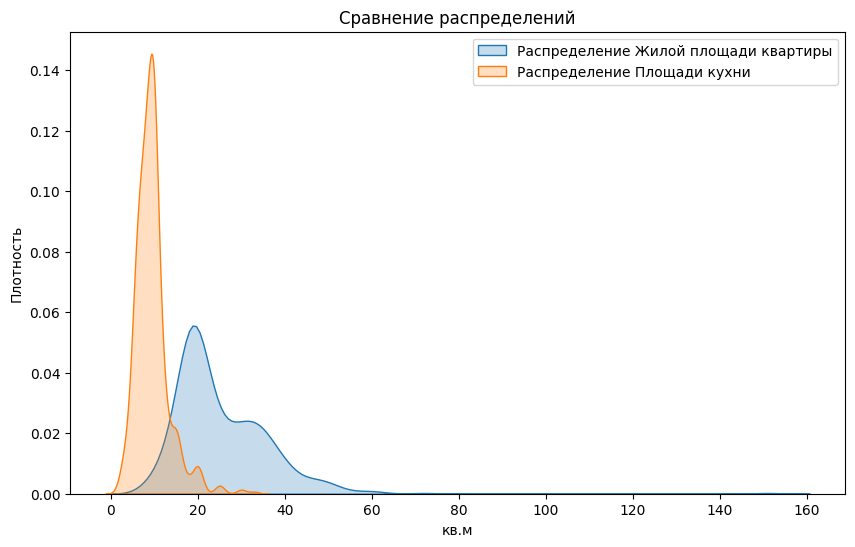

In [225]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_info['Жилая площадь'], label='Распределение Жилой площади квартиры', shade=True)
sns.kdeplot(df_info['Площадь кухни'], label='Распределение Площади кухни', shade=True)

plt.xlabel('кв.м')
plt.ylabel('Плотность')
plt.title('Сравнение распределений')
plt.legend()
plt.show()

__Опишем распределения параметров:__
- Распределение Площади кухни:
Кривая имеет выраженный пик и достаточно длинный правый хвост. Это распределение похоже на логнормальное распределение, но сильно скошенное вправо  
- Распределение Жилой площади квартиры:
Кривая также имеет приближенное к логнормальное распределение, но с меньшей дисперсией. У нее более блинный правый хвост, но при этом более пологий пик.

В таких случаях заполнение пропуском средним значением - это не самый оптимальный вариант, так как в случае таких скошенных распределений, среднее значение может быть сильно смещено в сторону хвоста. В таких случая лучше использовать либо методы МО с обученем модели, которая будет заполнять пропуски на основе заполненных данных, либо заполнять пропуски медианой. (Однако, медиана задачает значение, где ......, поэтому сначала надо сгруппировать квартиры таким образом, чтобы медиана была наиболее репрезентативна. В нашем примере наибольшу. корреляцию с ценой имеет показатель общей площади квартиры. При этом и площадь кухни, и жилая площадь имеют относительно высокое значение корреляции с общей площадью квартир. Следовательно, сгруппируем квартиры от по убыванию общей площади и возьмем медианной значение в этом случае))

In [226]:
live_median = df_info['Жилая площадь'].median()
print(live_median)
df_info['Жилая площадь'].fillna(live_median, inplace=True)

21.0


C:\Users\isobo\AppData\Local\Temp\ipykernel_16816\2382971995.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_info['Жилая площадь'].fillna(live_median, inplace=True)


In [227]:
kitch_median = df_info['Площадь кухни'].median()
print(kitch_median)
df_info['Площадь кухни'].fillna(kitch_median, inplace=True)

9.0


C:\Users\isobo\AppData\Local\Temp\ipykernel_16816\2394373064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_info['Площадь кухни'].fillna(kitch_median, inplace=True)


__'Пешком до метро'__

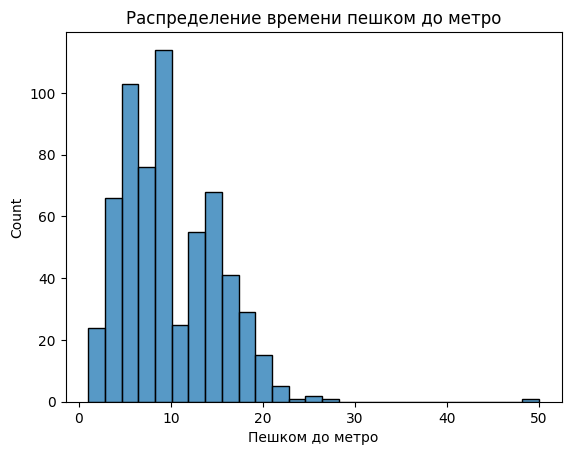

In [228]:
plt.title('Распределение времени пешком до метро')
sns.histplot(df_info['Пешком до метро'])
plt.show()

Заполним пропуски медианов, так как в ином случае распределение может быть подвергнуто изменениям

In [229]:

df_info['Пешком до метро'] = pd.to_numeric(df_info['Пешком до метро'], errors='coerce')
df_info['Пешком до метро'].fillna(df_info['Пешком до метро'].median, inplace=True)
df_info['Пешком до метро'] = pd.to_numeric(df_info['Пешком до метро'], errors='coerce')

C:\Users\isobo\AppData\Local\Temp\ipykernel_16816\3181508983.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 2       10.0
8       14.0
10      13.0
14       7.0
19      17.0
        ... 
1652     7.0
1653     5.0
1660    10.0
1663     5.0
1756     4.0
Name: Пешком до метро, Length: 627, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_info['Пешком до метро'].fillna(df_info['Пешком до метро'].median, inplace=True)


Теперь рассмотрим переменную Год постройки дома

<Axes: xlabel='Год постройки', ylabel='Count'>

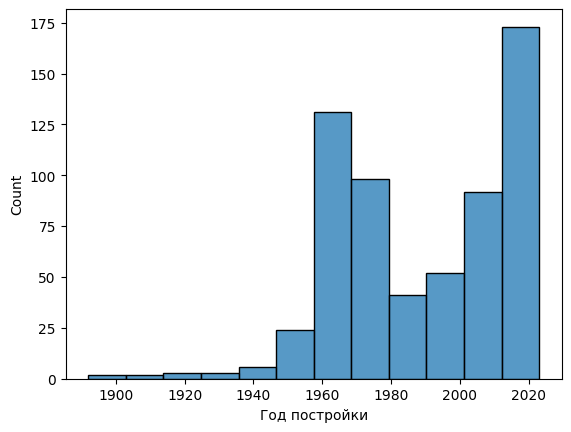

In [230]:
sns.histplot(df_info['Год постройки'])

__Вывод__:  Больше всего предлагают для сдачи квартиры после 2000 года (распределение имеет скос вправо). В данном случае лучше использовать медиану, так как она позволяет меньшим образом подвержена влиянию смещенного распределения. Также цена не в значительно мере коррелирует с годом постройки, так что не стоит заморачиваться

In [231]:
median_year = df_info['Год постройки'].median()
df_info['Год постройки'].fillna(median_year, inplace=True)


C:\Users\isobo\AppData\Local\Temp\ipykernel_16816\2878479041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_info['Год постройки'].fillna(median_year, inplace=True)


__Рассмотрим высотку потолков__

<Axes: xlabel='Высота потолков', ylabel='Count'>

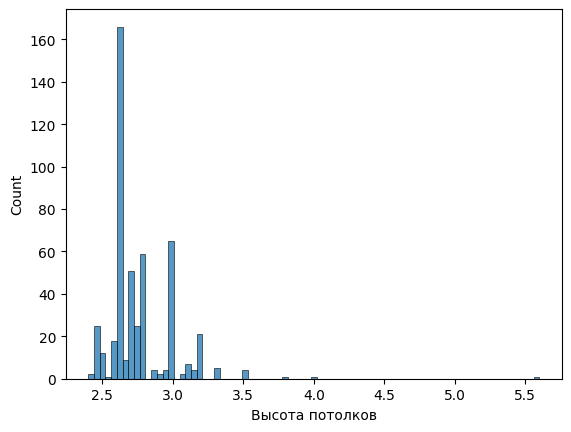

In [232]:
sns.histplot(df_info['Высота потолков'])

__Вывод:__

In [233]:
median_year = df_info['Высота потолков'].median()
df_info['Высота потолков'].fillna(median_year, inplace=True)

C:\Users\isobo\AppData\Local\Temp\ipykernel_16816\169663627.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_info['Высота потолков'].fillna(median_year, inplace=True)


In [234]:
df_info.isna().sum()

Link                  0
Цена                  0
Пешком до метро       1
Станция метро         0
Общая площадь         0
Жилая площадь         0
Площадь кухни         0
Высота потолков       0
Санузел               0
Балкон/лоджия         0
Ремонт                0
Год постройки         0
Строительная серия    0
Тип дома              0
Районы                0
Округа                0
В квартире есть       4
Залог                 0
Срок аренды           0
Апартаменты           0
Кол-во комнат         0
dtype: int64

In [235]:
df_info.dropna(subset=['В квартире есть'], inplace=True)

In [236]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 2 to 1756
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Link                623 non-null    object 
 1   Цена                623 non-null    float64
 2   Пешком до метро     622 non-null    float64
 3   Станция метро       623 non-null    object 
 4   Общая площадь       623 non-null    float64
 5   Жилая площадь       623 non-null    float64
 6   Площадь кухни       623 non-null    float64
 7   Высота потолков     623 non-null    float64
 8   Санузел             623 non-null    float64
 9   Балкон/лоджия       623 non-null    float64
 10  Ремонт              623 non-null    object 
 11  Год постройки       623 non-null    float64
 12  Строительная серия  623 non-null    object 
 13  Тип дома            623 non-null    object 
 14  Районы              623 non-null    object 
 15  Округа              623 non-null    object 
 16  В квартире е

In [237]:
df_info.dropna(subset=['Пешком до метро'], inplace=True)
df_info.head()

,Link,Цена,Пешком до метро,Станция метро,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,...,Год постройки,Строительная серия,Тип дома,Районы,Округа,В квартире есть,Залог,Срок аренды,Апартаменты,Кол-во комнат
2,https://www.cian.ru/rent/flat/257204026/,32000.0,10.0,Черкизовская,40.0,18.3,7.6,2.48,1.0,0.0,...,1974.0,ii-68,Панельный,Преображенский район,СВАО,"[Холодильник, Стиральная машина, Телевизор, Ин...",32000,от года,0,1
8,https://www.cian.ru/rent/flat/301264083/,150000.0,14.0,Спортивная,58.1,41.0,9.0,2.70,1.0,0.0,...,1957.0,Индивидуальный проект,Кирпичный,'р-н Хамовники',ЦАО,"[Холодильник, Посудомоечная машина, Стиральная...",150000,от года,0,2
10,https://www.cian.ru/rent/flat/300924649/,150000.0,13.0,Улица 1905 года,69.0,35.0,10.0,3.00,2.0,0.0,...,2018.0,Индивидуальный проект,Монолитный,'р-н Пресненский',ЦАО,"[Холодильник, Посудомоечная машина, Стиральная...",150000,от года,0,2
14,https://www.cian.ru/rent/flat/293041539/,450000.0,7.0,Смоленская,200.0,151.0,20.0,2.70,3.0,1.0,...,2010.0,Индивидуальный проект,Монолитный,'р-н Арбат',ЦАО,"[Холодильник, Посудомоечная машина, Стиральная...",450000,от года,0,2
19,https://www.cian.ru/rent/flat/301951602/,103600.0,17.0,Рабочий посёлок,62.0,36.0,10.0,2.70,1.0,0.0,...,2019.0,Индивидуальный проект,Монолитный,'р-н Можайский',ЗАО,"[Холодильник, Стиральная машина, Телевизор, Ин...",0,от года,0,2


In [238]:
df_info.to_csv('C:\\артем общее2\\учеба\\уник\\python\\питон2\\Проект\\ИТОГ 01.06\\пречесанные данные_01.06.csv', index=False)

In [239]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 2 to 1756
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Link                622 non-null    object 
 1   Цена                622 non-null    float64
 2   Пешком до метро     622 non-null    float64
 3   Станция метро       622 non-null    object 
 4   Общая площадь       622 non-null    float64
 5   Жилая площадь       622 non-null    float64
 6   Площадь кухни       622 non-null    float64
 7   Высота потолков     622 non-null    float64
 8   Санузел             622 non-null    float64
 9   Балкон/лоджия       622 non-null    float64
 10  Ремонт              622 non-null    object 
 11  Год постройки       622 non-null    float64
 12  Строительная серия  622 non-null    object 
 13  Тип дома            622 non-null    object 
 14  Районы              622 non-null    object 
 15  Округа              622 non-null    object 
 16  В квартире е

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
